# Connection to garmin connect

Historic Data : Garmin connect stores data during : 
- 2 years for health data
- 5 years for activities data

### Import

In [ ]:
import datetime
from datetime import timezone
from datetime import date, timedelta
import json
import logging
import os
import sys
from getpass import getpass
import matplotlib.pyplot as plt
from collections import Counter
from typing import List, Tuple, Dict


import readchar
import requests
from garth.exc import GarthHTTPError

from garminconnect import (
    Garmin,
    GarminConnectAuthenticationError,
    GarminConnectConnectionError,
    GarminConnectTooManyRequestsError,
)
from utils import display_json, display_text, timestamp_to_date, timestamp_to_date_iso


## Connection

In [4]:
# Configure debug logging
# logging.basicConfig(level=logging.DEBUG)
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [5]:
GARMIN_EMAIL = os.getenv("EMAIL")
GARMIN_PASSWORD = os.getenv("PASSWORD")

try:
    garmin = Garmin(GARMIN_EMAIL, GARMIN_PASSWORD)
except (
    GarminConnectConnectionError,
    GarminConnectAuthenticationError,
    GarminConnectTooManyRequestsError,
) as err:
    print("Error occurred during Garmin Connect Client init: %s" % err)
    quit()
except Exception:  # pylint: disable=broad-except
    print("Unknown error occurred during Garmin Connect Client init")
    quit()

In [7]:
"""
Login to Garmin Connect portal
Only needed at start of your program
The library will try to relogin when session expires
"""
print("Login attempt: ...")
print("----------------------------------------------------------------------------------------")
try:
    garmin.login()
    print(f"Welcom to Garmin connect {garmin.get_full_name()}")
except (
    GarminConnectConnectionError,
    GarminConnectAuthenticationError,
    GarminConnectTooManyRequestsError,
) as err:
    print("Error occurred during Garmin Connect Client login: %s" % err)
    quit()
except Exception:  # pylint: disable=broad-except
    print("Unknown error occurred during Garmin Connect Client login")
    quit()

Login attempt: ...
----------------------------------------------------------------------------------------
Welcom to Garmin connect Piquet


For explanation of login process : cf READAME.md

## Fetch the first data

### Random fetch

In [6]:
yesterday = date.today() - timedelta(days=1)
yesterday = yesterday.isoformat()
yesterday

'2025-03-16'

In [7]:
last_week = date.today() - timedelta(days=8)
last_week = last_week.isoformat()
last_week

'2025-03-09'

In [8]:
print(f"Data available : {garmin.get_stats(yesterday).keys()}")

Data available : dict_keys(['userProfileId', 'totalKilocalories', 'activeKilocalories', 'bmrKilocalories', 'wellnessKilocalories', 'burnedKilocalories', 'consumedKilocalories', 'remainingKilocalories', 'totalSteps', 'netCalorieGoal', 'totalDistanceMeters', 'wellnessDistanceMeters', 'wellnessActiveKilocalories', 'netRemainingKilocalories', 'userDailySummaryId', 'calendarDate', 'rule', 'uuid', 'dailyStepGoal', 'wellnessStartTimeGmt', 'wellnessStartTimeLocal', 'wellnessEndTimeGmt', 'wellnessEndTimeLocal', 'durationInMilliseconds', 'wellnessDescription', 'highlyActiveSeconds', 'activeSeconds', 'sedentarySeconds', 'sleepingSeconds', 'includesWellnessData', 'includesActivityData', 'includesCalorieConsumedData', 'privacyProtected', 'moderateIntensityMinutes', 'vigorousIntensityMinutes', 'floorsAscendedInMeters', 'floorsDescendedInMeters', 'floorsAscended', 'floorsDescended', 'intensityMinutesGoal', 'userFloorsAscendedGoal', 'minHeartRate', 'maxHeartRate', 'restingHeartRate', 'lastSevenDaysAvg

In [9]:
# garmin.get_steps_data(yesterday)
garmin.get_stats(yesterday)['totalKilocalories']


1933.0

In [10]:
garmin.get_user_summary(yesterday).keys()

dict_keys(['userProfileId', 'totalKilocalories', 'activeKilocalories', 'bmrKilocalories', 'wellnessKilocalories', 'burnedKilocalories', 'consumedKilocalories', 'remainingKilocalories', 'totalSteps', 'netCalorieGoal', 'totalDistanceMeters', 'wellnessDistanceMeters', 'wellnessActiveKilocalories', 'netRemainingKilocalories', 'userDailySummaryId', 'calendarDate', 'rule', 'uuid', 'dailyStepGoal', 'wellnessStartTimeGmt', 'wellnessStartTimeLocal', 'wellnessEndTimeGmt', 'wellnessEndTimeLocal', 'durationInMilliseconds', 'wellnessDescription', 'highlyActiveSeconds', 'activeSeconds', 'sedentarySeconds', 'sleepingSeconds', 'includesWellnessData', 'includesActivityData', 'includesCalorieConsumedData', 'privacyProtected', 'moderateIntensityMinutes', 'vigorousIntensityMinutes', 'floorsAscendedInMeters', 'floorsDescendedInMeters', 'floorsAscended', 'floorsDescended', 'intensityMinutesGoal', 'userFloorsAscendedGoal', 'minHeartRate', 'maxHeartRate', 'restingHeartRate', 'lastSevenDaysAvgRestingHeartRate'

In [11]:
garmin.get_floors(yesterday)

{'startTimestampGMT': '2025-03-14T23:00:00.0',
 'endTimestampGMT': '2025-03-15T23:00:00.0',
 'startTimestampLocal': '2025-03-15T00:00:00.0',
 'endTimestampLocal': '2025-03-16T00:00:00.0',
 'floorsValueDescriptorDTOList': [],
 'floorValuesArray': []}

In [12]:
garmin.get_daily_steps(last_week, yesterday)

[{'calendarDate': '2025-03-08',
  'totalSteps': None,
  'totalDistance': None,
  'stepGoal': None},
 {'calendarDate': '2025-03-09',
  'totalSteps': None,
  'totalDistance': None,
  'stepGoal': None},
 {'calendarDate': '2025-03-10',
  'totalSteps': 11997,
  'totalDistance': 11996,
  'stepGoal': 14660},
 {'calendarDate': '2025-03-11',
  'totalSteps': 13618,
  'totalDistance': 14350,
  'stepGoal': 14660},
 {'calendarDate': '2025-03-12',
  'totalSteps': 2200,
  'totalDistance': 1730,
  'stepGoal': 14660},
 {'calendarDate': '2025-03-13',
  'totalSteps': 12691,
  'totalDistance': 14000,
  'stepGoal': 14660},
 {'calendarDate': '2025-03-14',
  'totalSteps': 11577,
  'totalDistance': 12077,
  'stepGoal': 14660},
 {'calendarDate': '2025-03-15',
  'totalSteps': 16727,
  'totalDistance': 19286,
  'stepGoal': 14660}]

In [13]:
garmin.get_heart_rates(yesterday).keys()

dict_keys(['userProfilePK', 'calendarDate', 'startTimestampGMT', 'endTimestampGMT', 'startTimestampLocal', 'endTimestampLocal', 'maxHeartRate', 'minHeartRate', 'restingHeartRate', 'lastSevenDaysAvgRestingHeartRate', 'heartRateValues', 'heartRateValueDescriptors'])

In [14]:
garmin.get_all_day_stress(yesterday)['bodyBatteryValuesArray'][:10]

[[1741993200000, 'MEASURED', 31, 2.0],
 [1741993380000, 'MEASURED', 31, 2.0],
 [1741993560000, 'MEASURED', 32, 2.0],
 [1741993740000, 'MEASURED', 32, 2.0],
 [1741993920000, 'MEASURED', 32, 2.0],
 [1741994100000, 'MEASURED', 32, 2.0],
 [1741994280000, 'MEASURED', 32, 2.0],
 [1741994460000, 'MEASURED', 32, 2.0],
 [1741994640000, 'MEASURED', 32, 2.0],
 [1741994820000, 'MEASURED', 33, 2.0]]

In [15]:
garmin.get_personal_record()[2]

{'id': 2444970671,
 'typeId': 4,
 'status': 'ACCEPTED',
 'activityId': 15585601288,
 'activityName': 'Paris Course à pied',
 'activityType': 'running',
 'activityStartDateTimeInGMT': 1716708641000,
 'actStartDateTimeInGMTFormatted': '2024-05-26T07:30:41.0',
 'activityStartDateTimeLocal': 1716715841000,
 'activityStartDateTimeLocalFormatted': '2024-05-26T09:30:41.0',
 'value': 2320.009033203125,
 'prStartTimeGmt': 1716708641000,
 'prStartTimeGmtFormatted': '2024-05-26T07:30:41.0',
 'prStartTimeLocal': None,
 'prStartTimeLocalFormatted': None,
 'prTypeLabelKey': None,
 'poolLengthUnit': None}

### Fetch heart rate

#### Fecth heart rate for a day 

In [8]:
today = date.today().isoformat()
today

'2025-03-17'

In [13]:
display_json("heart_rates_data",garmin.get_heart_rates(today))

-------------------- heart_rates_data --------------------
{
    "userProfilePK": 104370935,
    "calendarDate": "2025-03-17",
    "startTimestampGMT": null,
    "endTimestampGMT": null,
    "startTimestampLocal": null,
    "endTimestampLocal": null,
    "maxHeartRate": null,
    "minHeartRate": null,
    "restingHeartRate": null,
    "lastSevenDaysAvgRestingHeartRate": null,
    "heartRateValueDescriptors": null,
    "heartRateValues": null
}
----------------------------------------------------------


In [9]:
heart_rate = garmin.get_heart_rates(today)['heartRateValues']
print(f'number of values {len(heart_rate)}')


number of values 358


In [10]:
print(f'first heart rate\ntimestamp : {heart_rate[0][0]}\nheart rate : {heart_rate[0][1]}\ndate: {timestamp_to_date(heart_rate[0][0])}')

first heart rate
timestamp : 1742166000000
heart rate : 61
date: 2025-03-17 00:00:00


In [12]:
timestamp:List[int] = [data[0] for data in heart_rate]
full_date:List[datetime.time] = [timestamp_to_date(data[0])for data in heart_rate]
date_hour:List[int] = [timestamp_to_date(data[0]).hour for data in heart_rate]
bpm = [data[1] for data in heart_rate]

print(timestamp[1]-timestamp[0], timestamp[2]-timestamp[1],len(date_hour),date_hour)
print(len(date_hour), len(bpm))
print(min(date_hour), max(date_hour))

120000 120000 358 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1

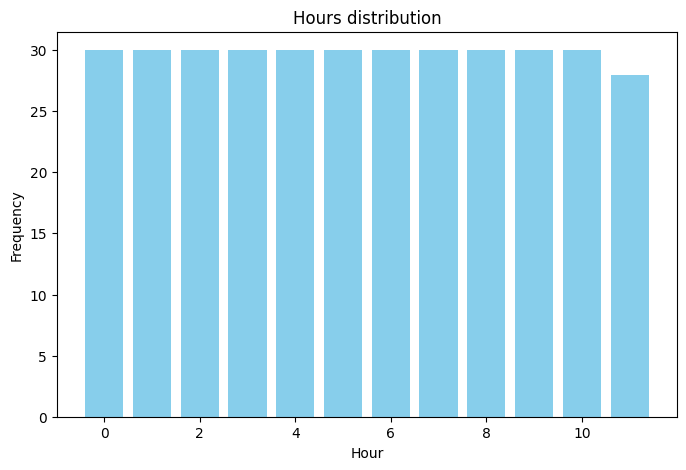

In [13]:
value_counts = Counter(date_hour)


labels, counts = zip(*value_counts.items())


plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color='skyblue')


plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Hours distribution')


plt.show()


This chart shows that during the day some values are missing. 

The missing values from 0am to 2am were because I didn't wear the watch during this time and the last sync was made at 1pm.
To retrieve all the hear rate since I have bought the watch I need to manage all the missing values caused by phone recharging.

There is also 30 by hour, so a heart rate mean is sent every 2 minutes which our granularity for this measure. 

Text(0.5, 1.0, 'Heart rate evolution during the day')

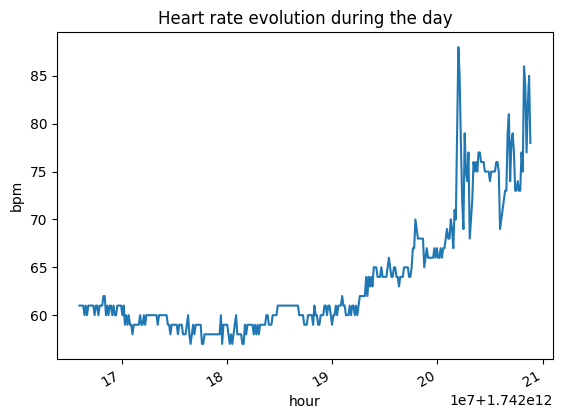

In [14]:

plt.plot(timestamp, bpm)
plt.gcf().autofmt_xdate()
plt.xlabel('hour')
plt.ylabel('bpm')
plt.title('Heart rate evolution during the day')

### Fetch for a week

# Example

### From medium

https://medium.com/@datascienceandvisualisation/a-walkthrough-of-downloading-and-analysing-garmin-connect-data-using-python-b38c51f2fd85

## From garmin connect

https://pypi.org/project/garminconnect/0.1.21/#description